# Sentiment Analysis

In [1]:
import pandas as pd

In [2]:
products = pd.read_csv('comments_on_products_pn.csv')

In [3]:
products.head()

,name,review,label
0,"Diono Stroller Fan, Bright,",use this to keep my daughter cool in her car s...,positive
1,"North States Superyard Play Yard, Grey, 6 Panel",wish it had a door or swing door attachment. w...,negative
2,YKS Cute Children Waterproof Apron With Cartoo...,"Cute, but not super sturdy. It will work for a...",negative
3,Fisher-Price Precious Planet Jumperoo,My baby boy adores his jumperoo. He has had th...,positive
4,"Nursery 101 Sidney Convertible Crib, White",I love this crib! It is the perfect width and ...,positive


In [4]:
products.shapehttp://localhost:8889/notebooks/asseignment/SentimentAnalysis.ipynb#Balancing-the-data

(1003, 3)

In [45]:
# class count
positive_count, negative_count = products['label'].value_counts()

# Separate class
positive = products[products['label'] == 'positive']
negative = products[products['label'] == 'negative']# print the shape of the class
print('positive:', positive.shape)
print('negative:', negative.shape)

positive: (782, 3)
negative: (221, 3)


# Balancing the data

total of positive and negative 0: positive    221
negative    221
Name: label, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

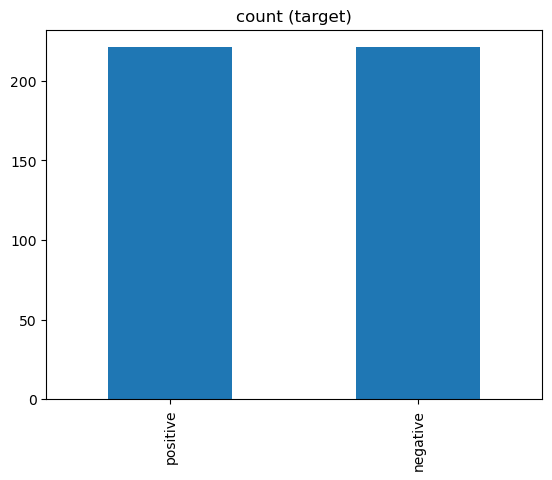

In [74]:
positive_under = positive.sample(negative_count)

pro = pd.concat([positive_under, negative], ignore_index=True, axis=0)

print("total of positive and negative 0:",pro['label'].value_counts())# plot the count after under-sampeling
pro['label'].value_counts().plot(kind='bar', title='count (target)')

In [75]:
pro.head()

,name,review,label
0,Medela Personal Fit XX Large Breastsheilds 36m...,I was using the 30mms for the longest time b/c...,positive
1,"Skip Hop Moby Bathtub Elbow Rest, Blue",This thing has been an elbow saver for sure! M...,positive
2,The First Years Ignite Stroller,What a perfect stroller! My son is 13 months o...,positive
3,Evenflo Snugli Comfort Vent Carrier,The weight is accurate for the snugli. It was ...,positive
4,Replacement Tubing (Retail Pack of 2) for Mede...,"After much use, my original tubing became clog...",positive


In [76]:
pro.label.value_counts()

positive    221
negative    221
Name: label, dtype: int64

In [77]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    442 non-null    object
 1   review  442 non-null    object
 2   label   442 non-null    object
dtypes: object(3)
memory usage: 10.5+ KB


# TF-IDF

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_data = vectorizer.fit_transform(pro)

In [155]:
bag_of_words = TfidfVectorizer(stop_words="english", analyzer='word')#max_features

In [165]:
data_words = bag_of_words.fit_transform(pro.review.values.astype('U'))

In [167]:
#data_words = bag_of_words.fit_transform(pro.review.values.astype('U'))

In [168]:
print(bag_of_words.get_feature_names()[400:410])

['box', 'boxes', 'boy', 'boyish', 'boys', 'bpa', 'br', 'bra', 'braces', 'brake']


In [169]:
data_words.shape

(442, 3730)

In [170]:
pd.DataFrame(data_words.toarray()).head(3)

,0,1,2,3,4,5,6,7,8,9,...,3720,3721,3722,3723,3724,3725,3726,3727,3728,3729
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12385,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
bag_of_words.vocabulary_

{'using': 3501,
 '30mms': 36,
 'longest': 1853,
 'time': 3315,
 'thought': 3298,
 'way': 3593,
 'need': 2074,
 '36': 39,
 'sorry': 2992,
 'waited': 3549,
 'long': 1851,
 'finally': 1235,
 'pain': 2244,
 'pump': 2482,
 'thing': 3287,
 'elbow': 1076,
 'saver': 2736,
 'sure': 3194,
 'makes': 1907,
 'easier': 1056,
 'lean': 1780,
 'tub': 3413,
 'bathing': 291,
 'baby': 251,
 'perfect': 2292,
 'stroller': 3139,
 'son': 2979,
 '13': 8,
 'months': 2025,
 'old': 2155,
 've': 3518,
 'original': 2189,
 'heavy': 1511,
 'came': 497,
 'infant': 1627,
 'carrier': 512,
 'travel': 3384,
 'point': 2359,
 'tried': 3398,
 'umbrella': 3442,
 'strollers': 3141,
 'stores': 3113,
 'just': 1701,
 'didn': 944,
 'like': 1813,
 'handles': 1470,
 'low': 1876,
 'tall': 3239,
 'hunching': 1578,
 'comfortable': 661,
 'short': 2849,
 'jaunts': 1679,
 'taking': 3236,
 'walks': 3558,
 'decently': 880,
 'priced': 2415,
 'higher': 1528,
 'adjustable': 109,
 'wanted': 3566,
 'little': 1834,
 'bit': 343,
 'storage': 3110,


In [172]:
print(bag_of_words.get_stop_words() )

frozenset({'against', 'hereupon', 'bill', 'former', 'nor', 'only', 'as', 'all', 'can', 'latterly', 'eleven', 'further', 'moreover', 'too', 'nothing', 'to', 'at', 'latter', 'amount', 'anyway', 'somehow', 'yourself', 'anything', 'name', 'whereupon', 'those', 'under', 'first', 'will', 'always', 'amoungst', 'for', 'also', 'we', 'give', 'per', 'formerly', 'found', 'again', 'sincere', 'an', 'afterwards', 'sixty', 'here', 'some', 'wherein', 'full', 'about', 'sometimes', 'therein', 'us', 'many', 'how', 'beyond', 'out', 'up', 'might', 'least', 'meanwhile', 'eg', 'un', 'mine', 'after', 'five', 'your', 'couldnt', 'both', 'fifteen', 'already', 'everything', 'namely', 'describe', 'down', 'herself', 'toward', 'they', 'serious', 'whom', 'the', 'forty', 'whoever', 'across', 'besides', 'ltd', 'still', 'anywhere', 'herein', 'hereby', 'yourselves', 'i', 'become', 'fire', 'it', 'no', 'this', 'beforehand', 'most', 'around', 'every', 'together', 'if', 'me', 'before', 'part', 'four', 'upon', 'whole', 'de', '

In [173]:
x=data_words
y=pro['label']

In [174]:
print('data  shape :', x.shape)
print('label  shape :', len(y))

data  shape : (442, 3730)
label  shape : 442


In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [176]:
from sklearn.svm import SVC  

In [177]:
svclassifier = SVC()  # probability=True, class_weight='balanced'

In [178]:
svclassifier.fit(X_train, y_train)

SVC()

In [179]:
svclassifier.classes_

array(['negative', 'positive'], dtype=object)

In [180]:
y_pred = svclassifier.predict(X_test)

In [181]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[29 36]
 [ 8 38]]
              precision    recall  f1-score   support

    negative       0.78      0.45      0.57        65
    positive       0.51      0.83      0.63        46

    accuracy                           0.60       111
   macro avg       0.65      0.64      0.60       111
weighted avg       0.67      0.60      0.60       111



In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6036036036036037

In [183]:
y_pred[93]

'positive'

In [184]:
products['review'][93]

'I sometimes think that there is an addictive substance hidden within our Sophie. Man, my toddler loves NOTHING more then this little creation. I initially scoffed at the price of this item and held out on buying it- until I saw my little guy try to steal it from a friend. The next day he got his own Sophie, and I became a believer. The price of this toy far outweighed the possible embarassment of him getting caught red handed again :) WORTH EVERY PENNY!'

In [185]:
pd.Series(y_pred).value_counts()

positive    74
negative    37
dtype: int64